# Порогова обробка зображень

У даній лабораторній роботі розглянуто наступні приклади порогової обробки зображень:
1. Глобальна порогова обробка
2. Бінарізція методом Оцу
3. Порогова обробка з декількома порогами
4. Адаптивна порогова обробка зображень

### Імпортуємо необхдіні пакети та бібліотеки

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Зчитаємо та завантажимо вхідне чорно-біле зображення та відобразимо його.

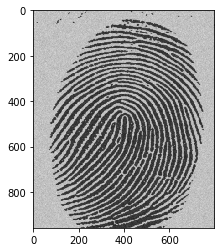

In [92]:
img = cv2.imread("./examples/Fig1038a.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255);
plt.show();

### Глобальна порогова обрбобка

Порогова обробка зображення - перетворення значень інтенсивності пікселів зображення  шляхом порівняння інтенсивності кожного пікселя  із заданим пороговим значенням та встановленням в задане значення інтенсивності.

Спочатку розглянемо бінарну порогову обробку. У даному випадку значення інтенсивності пікселів після порівняння з пороговим значенням встановлюється в одне з двух можливих значень інтенсивності (мініальне або максимальне).
Виконаємо  порогову обробку вхідного чорно-білого зображення з пороговим значенням **threshold = 127**, мінімальним значенням інтенсивності **min_val = 0**, максимальним значенням інтенсивності **max_val = 255**.

In [65]:
bin_img = img.copy()
threshold = 127
max_val = 255
min_val = 0

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            bin_img[row][col] = max_val
        else:
            bin_img[row][col] = min_val

Відобразимо вихідне зображення після порогової обробки.

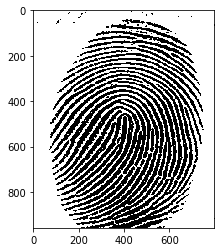

In [66]:
plt.imshow(bin_img, cmap = 'gray'); plt.show();

Для пороговї обробки зображення у OpenCV використовується функція **threshold**.

### Синтаксис функції
    retval, dst = cv2.threshold(src, thresh, maxval, type[, dst])
Параметри:
* **src** - вхідне зображення;<br>
* **thresh** - порогове значення;<br>
* **maxval** - максимальне значення;<br>
* **type** - тип порогової обробки:<br>  
    * cv2.THRESH_BINARY
    * cv2.THRESH_BINARY_INV
    * cv2.THRESH_TRUNC
    * cv2.THRESH_TOZERO
    * cv2.THRESH_TOZERO_INV
    <br>
<img src="./files/threshold_type.png">

Для глобальної порогової обробки за допомогою функції **threshold** необхідно передати параметр типу обробки **type=cv2.THRESH_BINARY**:

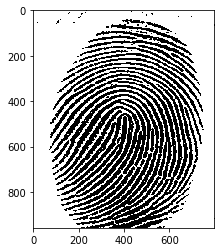

In [67]:
ret, thresh_bin = cv2.threshold(img, threshold, max_val, cv2.THRESH_BINARY)
plt.imshow(thresh_bin, cmap = 'gray'); plt.show();

Інший тип порогової обробки - зворотня глобальна порогова обробка. У даному випадку якщо значення інтенсивності пікселя більше заданого порогу **threshold = 127**, значення інтенсивності встановлюється у мінімальне значення **min_val = 0** у іншому разі значення інтенсивності встановлюється у максимальне значення **max_val = 255**.

In [68]:
bin_img_inv = img.copy()
threshold = 127
max_val = 255
min_val = 0

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            bin_img_inv[row][col] = min_val
        else:
            bin_img_inv[row][col] = max_val

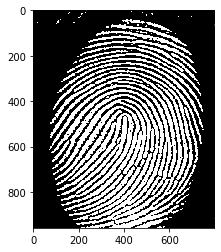

In [69]:
plt.imshow(bin_img_inv, cmap = 'gray'); plt.show();

Для зворотньої глобальної порогової обробки за допомогою функції threshold необхідно передати параметр типу обробки **type=cv2.THRESH_BINARY_INV**:

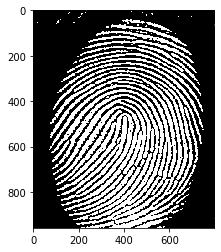

In [70]:
ret, thresh_bin_inv = cv2.threshold(img, threshold, max_val, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_bin_inv, cmap = 'gray'); plt.show();

Наступні типи прогової обробки перетворюють значення інтенсивності пікселів в задане максимальне або мінімальне значення тільки якщо значення інтенсивності пікселя більше або меньше заданого порогу, у протилежному разі занчення інтенсивності залишається без змін.

Розглянемо порогову обробку з обмеженням. У даному випадку якщо значення інтенсивності пікселя **більше** заданого порогу **threshold = 127**, значення інтенсивності встановлюється у порогове значення  **threshold = 127** у іншому разі значення інтенсивності залишається без змін.

In [71]:
img_trun = img.copy()
threshold = 127

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            img_trun[row][col] = threshold
        else:
            img_trun[row][col] = img[row][col]

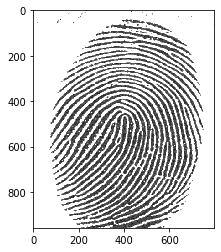

In [72]:
plt.imshow(img_trun, cmap = 'gray'); plt.show();

Для порогової обробки з обмеженням за допомогою функції threshold необхідно передати параметр типу обробки **type = cv2.THRESH_TRUNC**:

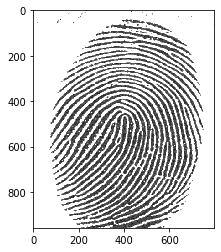

In [73]:
ret, thresh_trun = cv2.threshold(img, threshold, max_val, cv2.THRESH_TRUNC)
plt.imshow(thresh_trun, cmap = 'gray'); plt.show();

Ще один тип глобальної порогової обробки - порогова обробка до нуля. У даному випадку якщо значення інтенсивності пікселя **менше** заданого порогу **threshold = 127**, значення інтенсивності встановлюється у мінімальне значення **min_val = 0**, а у іншому разі значення інтенсивності залишається без змін.

In [74]:
img_zero = img.copy()
threshold = 127
min_val = 0

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            img_zero[row][col] = img[row][col]
        else:
            img_zero[row][col] = min_val

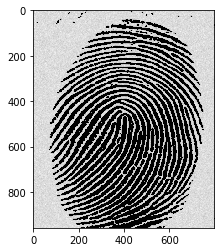

In [75]:
plt.imshow(img_zero, cmap = 'gray'); plt.show();

Для порогової обробки до нуля за допомогою функції threshold необхідно передати параметр типу обробки **type = cv2.THRESH_TOZERO**:

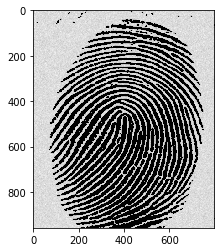

In [76]:
ret, thresh_zero = cv2.threshold(img, threshold, max_val, cv2.THRESH_TOZERO)
plt.imshow(thresh_zero, cmap = 'gray'); plt.show();

Ще один тип глобальної порогової обробки - зворотня порогова обробка до нуля. У даному випадку якщо значення інтенсивності пікселя **більше** заданого порогу **threshold = 127**, значення інтенсивності встановлюється у мінімальне значення **min_val = 0**, а у іншому разі значення інтенсивності залишається без змін.

In [77]:
img_zero_inv = img.copy()
threshold = 127
min_val = 0

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            img_zero_inv[row][col] = min_val
        else:
            img_zero_inv[row][col] = img[row][col]

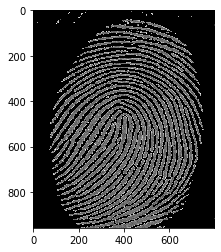

In [78]:
plt.imshow(img_zero_inv, cmap = 'gray'); plt.show();

Для порогової обробки до нуля за допомогою функції threshold необхідно передати параметр типу обробки **type = cv2.THRESH_TOZERO_INV**:

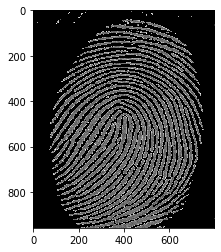

In [79]:
ret, thresh_zero_inv = cv2.threshold(img, threshold, max_val, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh_zero_inv, cmap = 'gray'); plt.show();

Для наглядності продемонструємо всі типи порогової обробки функції **cv2.threshold** на  зображенні градієнту відтінків сірого в діапазоні значеннь інтенсивності пікселів від 0 до 255.

Зчитаємо вхідне зображення.

In [89]:
img_g = cv2.imread('./examples/gradient.jpeg', cv2.IMREAD_GRAYSCALE)

Виконаємо порогову обробку з приведеними вище типами обробки.

In [90]:
min_val = 0
threshold = 127
max_val = 255
ret,thresh1 = cv2.threshold(img_g, threshold, max_val, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_g, threshold, max_val, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_g, threshold, max_val, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_g, threshold, max_val, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_g, threshold, max_val, cv2.THRESH_TOZERO_INV)

Відобразимо вхідне зображення та вихідні зображення після порогової обробки.

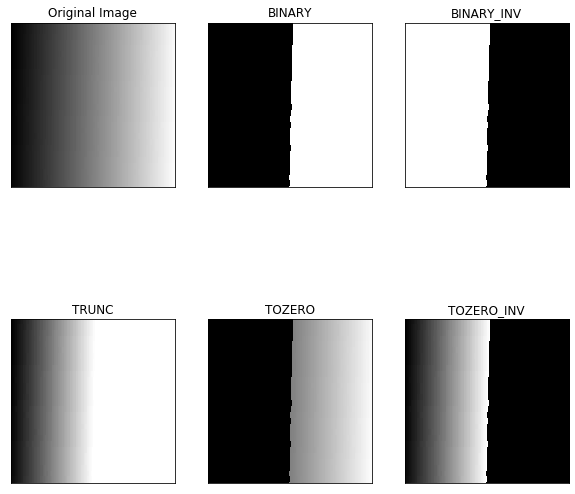

In [91]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Бінарізція методом Оцу

Метод Оцу базується на кластиризації значень інтенсивності пікселів та дозовляє автоматично визначати порогове значення для чорно-білого зображення. Даний метод розділяє пікселі зображення на два класи - переднього плану та фону, визначає порогове значення, щоб міжкласова дісперсія була максимальною.  

Для порогової обробки методом Оцу функції **cv2.threshold** необхідно передати параметр типу обробки **type = cv2.THRESH_OTSU**. Вхідним параметром порогового значення необхідно передати **0**. Далі функція визначить оптимальне порогове значення, яке буде повернуте другим вихідним параметром.

Зчитаємо та завантажимо вхідне чорно-біле зображення та відобразимо його.

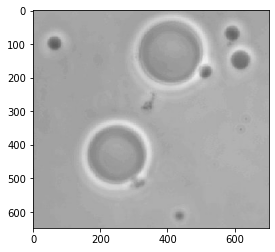

In [2]:
img_m = cv2.imread('./examples/Fig1039a.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_m, cmap = 'gray', vmin = 0, vmax = 255);
plt.show();

#### Глобальна порогова обробка

In [3]:
ret1, th1 = cv2.threshold(img_m, 170, 255, cv2.THRESH_BINARY)

#### Порогова обробка методом Оцу

In [4]:
ret2, th2 = cv2.threshold(img_m, 0, 255, cv2.THRESH_OTSU)

Відобразимо вхідні та вихідні зображення та гістограми

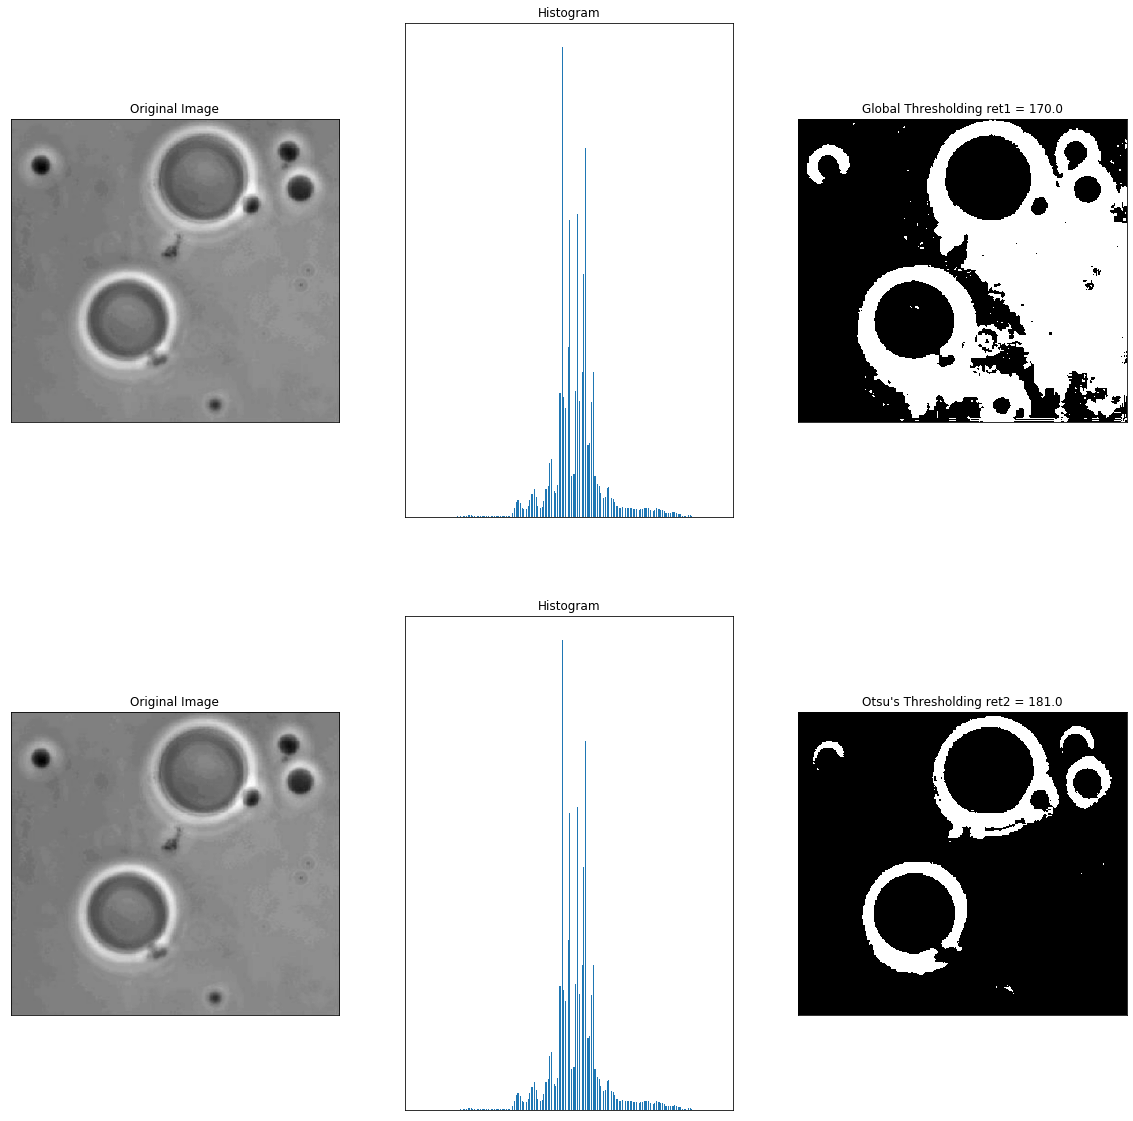

In [5]:
images = [img_m, 0, th1,
          img_m, 0, th2,]
titles = ['Original Image','Histogram','Global Thresholding' + ' ret1 = ' + str(ret1),
          'Original Image','Histogram',"Otsu's Thresholding" + ' ret2 = ' + str(ret2)]
plt.figure(figsize=(20,20))

plt.subplot(231),plt.imshow(img_m, 'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.hist(img_m.ravel(),256)
plt.title(titles[1]), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(th1, 'gray')
plt.title(titles[2]), plt.xticks([]), plt.yticks([])

plt.subplot(234),plt.imshow(img_m, 'gray')
plt.title(titles[3]), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.hist(img_m.ravel(),256)
plt.title(titles[4]), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(th2, 'gray')
plt.title(titles[5]), plt.xticks([]), plt.yticks([])

plt.show()

#### Інший приклад

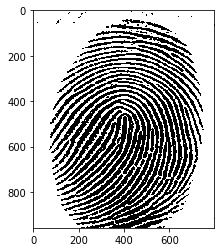

In [93]:
ret,thr = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thr, cmap = 'gray'); plt.show();

### 4. Адаптивна порогова обробка

У попередніх розділах були розглянуті приклади глобальної порогової обробки. Проте такий тип обробки не завжди можна використати, особливо при наявності нерівномірного освітлення в різних частинах зобарження. В даному випадку необхідно  використовувати адаптивну порогову обробку. Даний тип обробки визначає порогове значення для невеликого регіону вхідного зображення. Таким чином для одного зображення будемо мати декілька регіонів з різними пороговими значеннями.

Зчитаємо та завантажимо вхідне чорно-біле зображення та відобразимо його.

In [94]:
img = cv2.imread('./examples/Fig1050a.tif',0)

Для адаптивної пороговї обробки зображення у OpenCV використовується функція **adaptiveThreshold**.


### Синтаксис функції
    dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst])
Параметри:
* **src** - вхідне зображення;<br>
* **maxValue** - не нульове значення інтенсивності, що буде присвоєно в результаті обробки;<br>
* **adaptiveMethod** - тип адаптивного алгоритму:<br>  
    * cv2.ADAPTIVE_THRESH_MEAN_C
    * cv2.ADAPTIVE_THRESH_GAUSSIAN_C
* **thresholdType** - тип порогового перетворення:<br>
    * cv2.THRESH_BINARY
    * cv2.THRESH_BINARY_INV
* **blockSize** - розмір блоку в межах якого буде визначено порогове значення для поточного пікселя - 3, 5, 7 і тд;<br>
* **С** - константа, яка віднімається від розахованого середньго значення.   

Виконаємо глобальну поргову обробку та адаптивну порогову обробку для зображення з нерівномірним освітленням.

In [95]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

Відобразимо вхідне та вихідні зображення

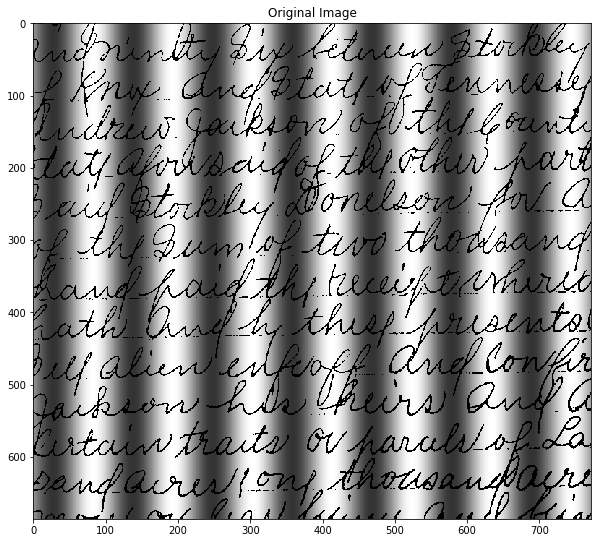

In [96]:
plt.figure(figsize=(10,10))
plt.imshow(img, cmap = 'gray'); plt.title('Original Image'); plt.show();

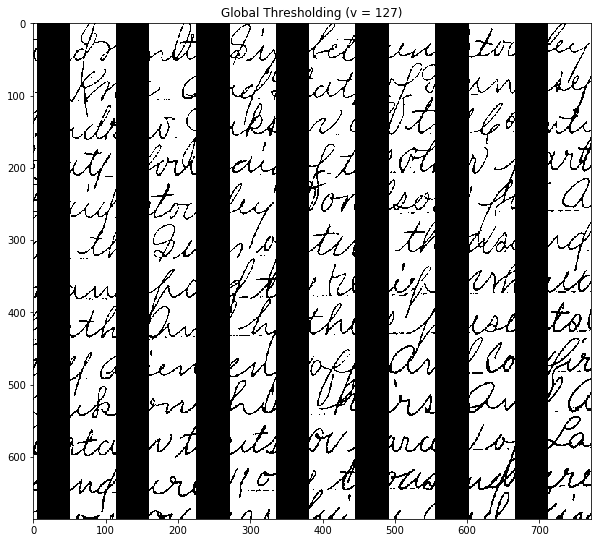

In [97]:
plt.figure(figsize=(10,10))
plt.imshow(th1, cmap = 'gray'); plt.title('Global Thresholding (v = 127)'); plt.show();

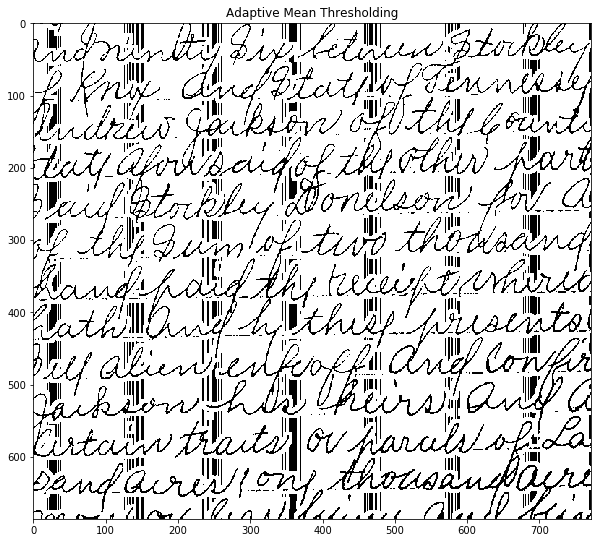

In [98]:
plt.figure(figsize=(10,10))
plt.imshow(th2, cmap = 'gray'); plt.title('Adaptive Mean Thresholding'); plt.show();

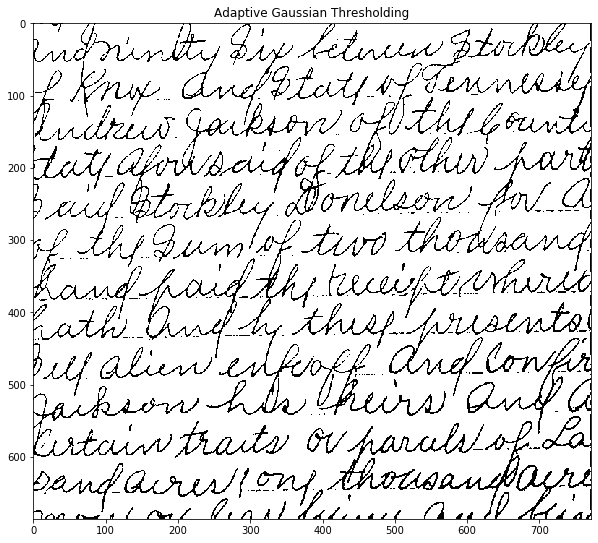

In [99]:
plt.figure(figsize=(10,10))
plt.imshow(th3, cmap = 'gray'); plt.title('Adaptive Gaussian Thresholding'); plt.show();

# Завдання
## 1. Методами порогової та морфологічної обробки відобразити тільки контури циферблату
 Завантажити зображення "digit.jpg" директорії "./examples/"
 
<table><tr>
<td> <img src="./examples/digit.jpg" height="500" width="500"> </td>
</tr></table>

## 2. Методами порогової та морфологічної обробки відобразити границі баскетбольного поля
 Завантажити зображення "basketball.jpg" директорії "./examples/"
 
<table><tr>
<td> <img src="./examples/basketball.jpg" height="500" width="500"> </td>
</tr></table>

## Додаткове завдання
### 1. На основі лабораторної работи Draw_OpenCV обвести контури знайдених об'єктів


### 2. Визначити область зображення на якій зображений QR-код - x, y, ширина, висота. Відобразити баундинг бокс.

Завантажити зображення "frame1.jpg" директорії "./examples/". Приклад зображення та результату наведений нижче.
 
<table><tr>
<td> <img src="./examples/frame1.jpg" height="500" width="500"> </td>
<td> <img src="./examples/output.png" height="500" width="500"> </td>
</tr></table>

### 3. Виконати декодування QR коду. Вивести код над баундінг боксом (як показано в прикладі вище)